In [1]:
#%run MChain.ipynb
import torch
import graphviz as gv
from MChain import MChain
torch.set_printoptions(precision=2)

# construct a Markov chain

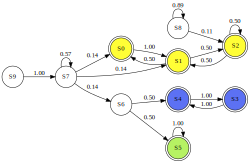

In [2]:
# building a chain using an (unnormalized) transition matrix

T10 = torch.tensor([[0,1,0,0,0,0,0,0,0,0],[1,0,1,0,0,0,0,0,0,0],
                [0,1,1,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0],
                [0,0,0,0,1,1,0,0,0,0],[1,1,0,0,0,0,1,4,0,0],
                [0,0,1,0,0,0,0,0,8,0],[0,0,0,0,0,0,0,1,0,0]], dtype=torch.float, requires_grad=False)

mc = MChain(device='cuda')
mc.from_matrix(T10, prefix='S')
mc.display(size=3.5) 

# analyse a chain

In [3]:
# calculate relevant data 
mc.analyse()

In [4]:
print('transient states:', [i0 for i0 in mc.list_states() if mc.ti(i0)])
print('recurrent states:', [i0 for i0 in mc.list_states() if mc.ri(i0)])

transient states: ['S6', 'S7', 'S8', 'S9']
recurrent states: ['S0', 'S1', 'S2', 'S3', 'S4', 'S5']


In [5]:
print('expected absorbing times starting from:\n')

for i0 in ['S9', 'S7', 'S6', 'S8', 'S4']:
    print(f'  {i0}: {mc.ai(i0)}') 

expected absorbing times starting from:

  S9: 3.6666669845581055
  S7: 2.6666669845581055
  S6: 1.0
  S8: 9.000000953674316
  S4: 1.0


In [6]:
print('period of states:\n')

for i0 in ['S2', 'S4', 'S6']:
    print(f'  {i0}: {mc.pi(i0)}')

period of states:

  S2: 1
  S4: 2
  S6: 0


In [7]:
print('relative duration in states:\n')

for i0 in ['S2', 'S4', 'S6', 'S9']:
    print(f'  {i0}: {mc.di(i0)} %')

relative duration in states:

  S2: 0.4000000059604645 %
  S4: 0.5 %
  S6: 0.0 %
  S9: 0.0 %


In [8]:
print('internal state ids:\n')

for i0 in ['S2', 'S4', 'S6', 'S9']:
    print(f'  {i0}: {mc.ii(i0)}')

internal state ids:

  S2: 2
  S4: 4
  S6: 6
  S9: 9


In [9]:
print('state names of state ids:\n')

for i0 in [1,3, 5, 2]:
    print(f'  {i0}: {mc.si(i0)}')

state names of state ids:

  1: S1
  3: S3
  5: S5
  2: S2


In [10]:
print('class of states:\n')

for i0 in ['S2', 'S4', 'S6', 'S9']:
    print(f'  {i0}: {mc.ci(i0)}')

class of states:

  S2: 1
  S4: 2
  S6: 0
  S9: 0


# probabilities and indicators

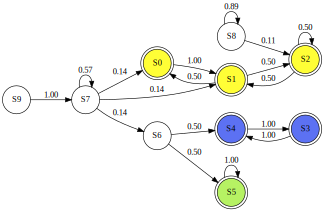

In [11]:
mc.display()

### transition probabilities: Pij, P

In [12]:
print(mc.Pij('S7','S0'))
print(mc.Pij('S6','S4'))
print('')
print(mc.P)

tensor(0.14)
tensor(0.50)

tensor([[0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.50, 0.00, 0.50, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.50, 0.50, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.50, 0.50, 0.00, 0.00, 0.00, 0.00],
        [0.14, 0.14, 0.00, 0.00, 0.00, 0.00, 0.14, 0.57, 0.00, 0.00],
        [0.00, 0.00, 0.11, 0.00, 0.00, 0.00, 0.00, 0.00, 0.89, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00]])


### probability to reach a state: Hij, H 

In [13]:
print(mc.Hij('S9','S5'))
print(mc.Hij('S9','S1'))
print(mc.Hij('S8','S0'))
print('')
print(mc.H)

tensor(0.17)
tensor(0.67)
tensor(1.)

tensor([[1.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [1.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [1.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.50, 0.50, 0.50, 0.00, 0.00, 0.00, 0.00],
        [0.67, 0.67, 0.67, 0.17, 0.17, 0.17, 0.33, 0.57, 0.00, 0.00],
        [1.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.89, 0.00],
        [0.67, 0.67, 0.67, 0.17, 0.17, 0.17, 0.33, 1.00, 0.00, 0.00]])


### reachability: Rij, R

In [14]:
# is there a path from state i to state j?

print(mc.Rij('S9','S4'))
print(mc.Rij('S7','S8'))
print('')
print(mc.R.int())

tensor(1, dtype=torch.int32)
tensor(0, dtype=torch.int32)

tensor([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]], dtype=torch.int32)


### visits indicator: Eij, E

In [15]:
# are visits from state i to state j possible, impossible or sure
# Eij: 0: impossible, 1: sure -1: possible

print(mc.Eij('S9','S5')) # possible
print(mc.Eij('S8','S0')) # sure
print(mc.Eij('S6','S8')) # 
print('')
print(mc.E)

tensor(-1, dtype=torch.int32)
tensor(1, dtype=torch.int32)
tensor(0, dtype=torch.int32)

tensor([[ 1,  1,  1,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  1,  1,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  1,  1,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  1,  1,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  1,  1,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
        [ 0,  0,  0, -1, -1, -1,  0,  0,  0,  0],
        [-1, -1, -1, -1, -1, -1, -1, -1,  0,  0],
        [ 1,  1,  1,  0,  0,  0,  0,  0, -1,  0],
        [-1, -1, -1, -1, -1, -1, -1,  1,  0,  0]], dtype=torch.int32)


### expected time to visit a state: Tij, T

In [16]:
# if it is not sure to visit state j from state i, Tij=-1

print(mc.Tij('S2','S0'))
print(mc.Tij('S8','S1'))      
print('')
print(mc.T)

tensor(6.)
tensor(11.00)

tensor([[ 5.00,  1.00,  4.00, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00],
        [ 4.00,  2.50,  3.00, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00],
        [ 6.00,  2.00,  2.50, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00],
        [-1.00, -1.00, -1.00,  2.00,  1.00, -1.00, -1.00, -1.00, -1.00, -1.00],
        [-1.00, -1.00, -1.00,  1.00,  2.00, -1.00, -1.00, -1.00, -1.00, -1.00],
        [-1.00, -1.00, -1.00, -1.00, -1.00,  1.00, -1.00, -1.00, -1.00, -1.00],
        [-1.00, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00],
        [-1.00, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00],
        [15.00, 11.00,  9.00, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00],
        [-1.00, -1.00, -1.00, -1.00, -1.00, -1.00, -1.00,  1.00, -1.00, -1.00]])


### expected visit count of state j starting in state i: Vij, V

In [17]:
# Vij=-1 indicates possible or infinit visits

print(mc.Vij('S7','S7'))
print(mc.Vij('S9','S7'))
print(mc.Vij('S4','S3')) # infinit visists
print(mc.Vij('S9','S3')) # visit only possible  (Eij==-1)
print('')
print(mc.V)

tensor(1.33)
tensor(2.33)
tensor(-1.)
tensor(-1.)

tensor([[-1.00, -1.00, -1.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [-1.00, -1.00, -1.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [-1.00, -1.00, -1.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00, -1.00, -1.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00, -1.00, -1.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00, -1.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00, -1.00, -1.00, -1.00,  0.00,  0.00,  0.00,  0.00],
        [-1.00, -1.00, -1.00, -1.00, -1.00, -1.00,  0.33,  1.33,  0.00,  0.00],
        [-1.00, -1.00, -1.00,  0.00,  0.00,  0.00,  0.00,  0.00,  8.00,  0.00],
        [-1.00, -1.00, -1.00, -1.00, -1.00, -1.00,  0.33,  2.33,  0.00,  0.00]])


### class absorbing probabilities: Qi, Q

In [18]:
print('absorbing probabilities of classes 1,2,3...:', mc.Qi('S7'))
print('')
print(mc.Q)

absorbing probabilities of classes 1,2,3...: tensor([0.67, 0.17, 0.17])

tensor([[1.00, 0.00, 0.00],
        [1.00, 0.00, 0.00],
        [1.00, 0.00, 0.00],
        [0.00, 1.00, 0.00],
        [0.00, 1.00, 0.00],
        [0.00, 0.00, 1.00],
        [0.00, 0.50, 0.50],
        [0.67, 0.17, 0.17],
        [1.00, 0.00, 0.00],
        [0.67, 0.17, 0.17]])


# birth-death process

In [19]:
N = 6
U = torch.zeros(N,N)
U = torch.diagonal_scatter(U,torch.ones(N-1),offset=1)
U = torch.diagonal_scatter(U,torch.ones(N),offset=0)
U = torch.diagonal_scatter(U,torch.ones(N-1),offset=-1)
U[N-1,N-2] = 0

mc1 = MChain()
mc1.from_matrix(U)
#mc1.display()
mc1.analyse()

In [20]:
# expected times to visit states 

mc1.T

tensor([[-1.00,  2.00,  7.00, 15.00, 26.00, 40.00],
        [-1.00, -1.00,  5.00, 13.00, 24.00, 38.00],
        [-1.00, -1.00, -1.00,  8.00, 19.00, 33.00],
        [-1.00, -1.00, -1.00, -1.00, 11.00, 25.00],
        [-1.00, -1.00, -1.00, -1.00, -1.00, 14.00],
        [-1.00, -1.00, -1.00, -1.00, -1.00,  1.00]])

In [21]:
# expected visit counts until absorption

mc1.V

tensor([[ 9.00, 12.00,  9.00,  6.00,  3.00, -1.00],
        [ 8.00, 11.00,  9.00,  6.00,  3.00, -1.00],
        [ 6.00,  9.00,  8.00,  6.00,  3.00, -1.00],
        [ 4.00,  6.00,  6.00,  5.00,  3.00, -1.00],
        [ 2.00,  3.00,  3.00,  3.00,  2.00, -1.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00, -1.00]])